In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas as gpd
import seaborn as sns

import scipy as sp
from scipy import stats

Sade took this [fairly messy data](https://www2.gwu.edu/~calm/data/north.htm) and turned it into something great!

In [36]:
data= pd.read_csv('../arctic-data/CALM_export.csv')

In [37]:
data.head()

,Site_Code,Site_Name,Latitude,Longitude,Method,URL,F7,F8,F9,F10,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,U1,Barrow,71.316667,-156.600000,1000/T,www.gwu.edu/~calm/data\webforms\u1_f.htm,,0,0,30,...,32,32,34,34,41,41,38,41,34,40
1,U2,"Barrow, CRREL Plots",71.316667,-156.583333,10/T,www.gwu.edu/~calm/data\webforms\u2_f.htm,,23,23,29,...,34,35,35,36,41,39,38,40,34,39
2,U3,Atkasuk,70.450000,-157.400000,1000/T,www.gwu.edu/~calm/data\webforms\u3_f.htm,,0,0,0,...,47,46,49,54,49,50,50,58,52,54
3,U4,West Dock 1 ha grid,70.366667,-148.550000,100/T/B56,www.gwu.edu/~calm/data/webforms/u4_f.htm,,0,0,0,...,34,27,30,25,29,29,34,35,31,37
4,U5,West Dock 1 km grid,70.366667,-148.566667,1000,www.gwu.edu/~calm/data/webforms/u5_f.htm,,0,0,48,...,53,44,47,44,46,51,52,54,48,54


# Major cleaning!!

In [38]:
year_names = np.arange(1990, 2016, 1)

old_columns = data.columns[6:32]

mapping = {old_columns[i]: year_names[i] for i in range(len(old_columns))}

data = data.rename(columns=mapping)

In [39]:
data = data.fillna(np.nan)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.replace(0.0, np.nan, inplace= True)
data.replace(">263", np.nan, inplace= True)
data.replace(">260", np.nan, inplace= True)
data.replace(">235", np.nan, inplace= True)

In [40]:
data

,Site_Code,Site_Name,Latitude,Longitude,Method,URL,1990,1991,1992,1993,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,U1,Barrow,71.316667,-156.600000,1000/T,www.gwu.edu/~calm/data\webforms\u1_f.htm,NaN,NaN,NaN,30.0,...,32.0,32.0,34,34.0,41.0,41.0,38.0,41.0,34.0,40.0
1,U2,"Barrow, CRREL Plots",71.316667,-156.583333,10/T,www.gwu.edu/~calm/data\webforms\u2_f.htm,NaN,23.0,23.0,29.0,...,34.0,35.0,35,36.0,41.0,39.0,38.0,40.0,34.0,39.0
2,U3,Atkasuk,70.450000,-157.400000,1000/T,www.gwu.edu/~calm/data\webforms\u3_f.htm,NaN,NaN,NaN,NaN,...,47.0,46.0,49,54.0,49.0,50.0,50.0,58.0,52.0,54.0
3,U4,West Dock 1 ha grid,70.366667,-148.550000,100/T/B56,www.gwu.edu/~calm/data/webforms/u4_f.htm,NaN,NaN,NaN,NaN,...,34.0,27.0,30,25.0,29.0,29.0,34.0,35.0,31.0,37.0
4,U5,West Dock 1 km grid,70.366667,-148.566667,1000,www.gwu.edu/~calm/data/webforms/u5_f.htm,NaN,NaN,NaN,48.0,...,53.0,44.0,47,44.0,46.0,51.0,52.0,54.0,48.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,CN11,Shallow Borehole,43.100000,86.816667,T,www.gwu.edu/~calm/data/webforms/cn_f.html,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,K0,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B25,www.gwu.edu/~calm/data\webforms\k_f.html,480,510.0,510.0,470.0,...,495.0,505.0,513,638.0,688.0,569.0,NaN,NaN,NaN,NaN
248,K1,Northern Tien Shan; Cosmostation,43.083333,76.916667,T/B14,www.gwu.edu/~calm/data/webforms/k_f.html,450,490.0,460.0,420.0,...,NaN,495.0,500,495.0,486.0,457.0,NaN,NaN,NaN,NaN


## Write an algorithm that grabs an x and y array for years and measurements

In [41]:
for sites in range(len(data)):
  y_floats = np.array(data.iloc[sites, 6:32].values, dtype=float)
  y = y_floats[~np.isnan(y_floats)]
  x = year_names[~np.isnan(y_floats)]
  if np.sum([np.isnan(y)==False])>10:
    data.loc[(sites, "average")] = np.mean(y)
  # if np.any(y) == True:
    res = stats.linregress(x,y)
    data.loc[(sites, "slope")] = res[0]
    data.loc[(sites, "intercept")] = res[1]
    data.loc[(sites, "rvalue")] = res[2]
    data.loc[(sites, "pvalue")] = res[3]
    data.loc[(sites, "stderr")] = res[4]
  else:
    continue

In [42]:
data.head()

,Site_Code,Site_Name,Latitude,Longitude,Method,URL,1990,1991,1992,1993,...,2012,2013,2014,2015,average,slope,intercept,rvalue,pvalue,stderr
0,U1,Barrow,71.316667,-156.600000,1000/T,www.gwu.edu/~calm/data\webforms\u1_f.htm,NaN,NaN,NaN,30.0,...,38.0,41.0,34.0,40.0,35.565217,0.189723,-344.640316,0.323697,0.131880,0.121015
1,U2,"Barrow, CRREL Plots",71.316667,-156.583333,10/T,www.gwu.edu/~calm/data\webforms\u2_f.htm,NaN,23.0,23.0,29.0,...,38.0,40.0,34.0,39.0,34.480000,0.399231,-765.179231,0.585586,0.002102,0.115234
2,U3,Atkasuk,70.450000,-157.400000,1000/T,www.gwu.edu/~calm/data\webforms\u3_f.htm,NaN,NaN,NaN,NaN,...,50.0,58.0,52.0,54.0,48.238095,0.468831,-891.768398,0.528559,0.013766,0.172743
3,U4,West Dock 1 ha grid,70.366667,-148.550000,100/T/B56,www.gwu.edu/~calm/data/webforms/u4_f.htm,NaN,NaN,NaN,NaN,...,34.0,35.0,31.0,37.0,30.800000,0.099248,-168.242105,0.182255,0.441856,0.126203
4,U5,West Dock 1 km grid,70.366667,-148.566667,1000,www.gwu.edu/~calm/data/webforms/u5_f.htm,NaN,NaN,NaN,48.0,...,52.0,54.0,48.0,54.0,50.000000,-0.108696,267.826087,-0.184302,0.399878,0.126493


## Now make it a map!

In [43]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs='epsg:4326')

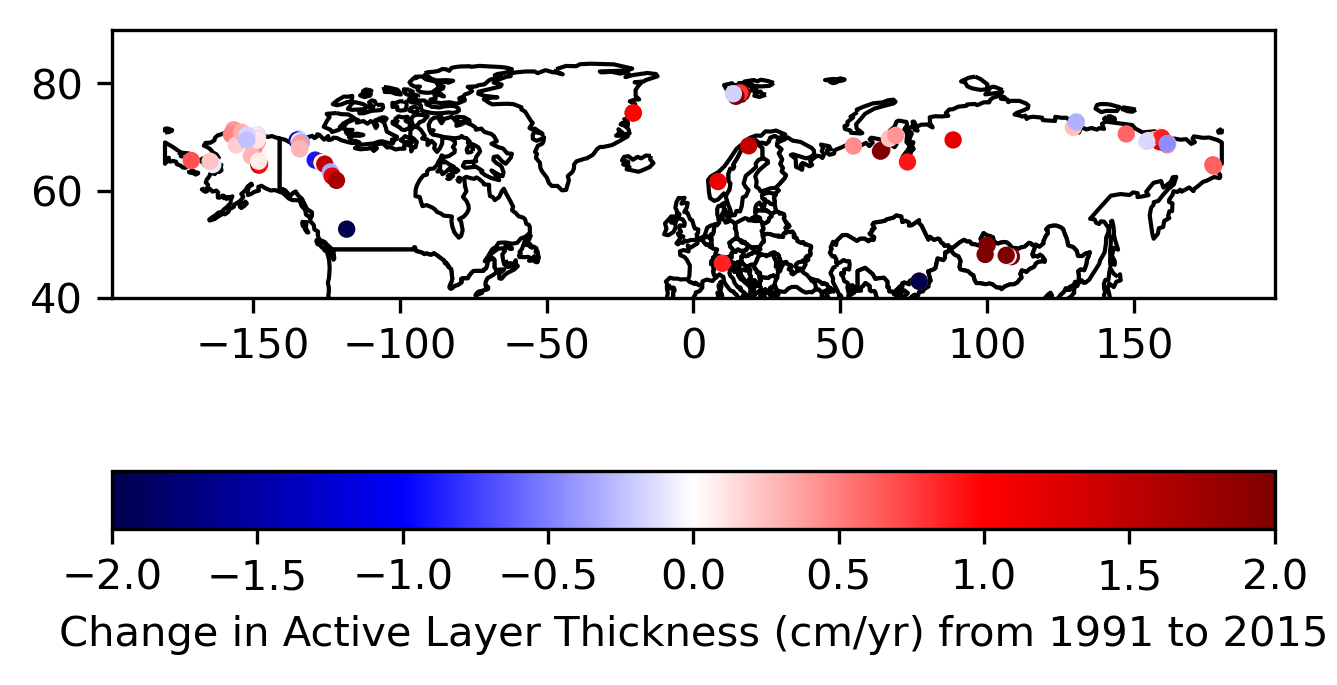

In [46]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(5,5),dpi=300)
im = world.plot(
    color='white', edgecolor='black', ax=ax)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, column='slope', vmin=-2, vmax=2,cmap='seismic', s=10, legend=True, legend_kwds={'label': "Change in Active Layer Thickness (cm/yr) from 1991 to 2015",
                        'orientation': "horizontal"})

ax.set_ylim(40,90)
plt.show()